<a href="https://colab.research.google.com/github/JY0723/2024-2-DL/blob/main/DLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Final Project



###dataset 분석

https://github.com/dev-jaemin/Korean-MBTI-Conversation-Dataset/tree/main

qna_cleaned.tsv

* (index) : 자동 index
* id
* article_id : 게시글 번호
* menu_id : 게시판 번호 (11~18)
* question : 게시글의 마지막 4문장 (문장을 [SEP] 토큰으로 구분)
* answer : 댓글 첫 2문장 (문장을 [SEP] 토큰으로 구분)
* q_mbti : 글 작성자 mbti (유추 불가능하면 null)
* a_mbti : 댓글 작성자 mbti (유추 불가능하면 null)
(8~512자 사이의 컨텐츠만 존재.)

multiple_qna_cleaned.tsv

* 컬럼 내용은 위의 파일과 동일. 한 게시글에 여러 댓글이 대응되도록 크롤링함.

In [51]:
pip install pandas matplotlib seaborn

In [14]:
import pandas as pd

#데이터셋 링크 로드
qna_cleaned_url = 'https://raw.githubusercontent.com/dev-jaemin/Korean-MBTI-Conversation-Dataset/main/qna_cleaned.tsv'
multiple_qna_cleaned_url = 'https://raw.githubusercontent.com/dev-jaemin/Korean-MBTI-Conversation-Dataset/main/multiple_qna_cleaned.tsv'

#데이터셋 로드
qna_cleaned = pd.read_csv(qna_cleaned_url, sep='\t')
multiple_qna_cleaned = pd.read_csv(multiple_qna_cleaned_url, sep='\t')

In [53]:
# 두 데이터셋 합치기
combined_qna = pd.concat([qna_cleaned, multiple_qna_cleaned], ignore_index=True)

# 결과 확인
print("Combined DataFrame 크기:", combined_qna.shape)
print(combined_qna.head())

Combined DataFrame 크기: (119483, 8)
   Unnamed: 0  id  article_id  menu_id  \
0           0   1      804077       11   
1           1   2      804070       11   
2           2   4      804044       11   
3           3   5      804033       11   
4           4   6      804012       11   

                                            question  \
0                                         궁금해요 [SEP]   
1  사귄 지 얼마 안 됐고 섬 탈 때도 그냥 용건만 연락하는 편이길래 그러려니 했는데 ...   
2  알려줘야 된다고 생각하세요?[SEP]아니면 굳이 필요 없다고 생각하세요?[SEP]자...   
3                            애칭 어떻게 부르셨는지 알려주세요[SEP]   
4  나만 남자친구랑 데이트 생각하는 거 같고 어찌나 서운하던지 근데 또 집에 가면 편해...   

                                              answer q_mbti a_mbti  
0         공방 가서 맞추는 건 싫고 금으로 맞추는 거 아님[SEP]싫어요 ㅎ[SEP]    NaN   istj  
1                  원하시는 일상 공유가 어떤 건지 [SEP]궁금해요 [SEP]    NaN   intp  
2                  저는 무조건 ..![SEP]말해야 된다고 생각해요 [SEP]    NaN   enfp  
3  자기 정도만 쓰는 거 같아요.[SEP] 애인을 지칭할 때 '너'라고 하기에는 너무 ...   intj   istj  
4  직장 상사 스타일이라고 생각하심 돼요 [SEP]제

In [54]:
# [SEP] 문구 삭제
qna_cleaned['question'] = qna_cleaned['question'].str.replace('[SEP]', '', regex=False)
qna_cleaned['answer'] = qna_cleaned['answer'].str.replace('[SEP]', '', regex=False)

qna_cleaned['question'] = qna_cleaned['question'].str.replace('[sep]', '', regex=False)
qna_cleaned['answer'] = qna_cleaned['answer'].str.replace('[sep]', '', regex=False)

#### 데이터셋 확인

In [55]:
#기본 정보 확인
print(qna_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31066 entries, 0 to 31065
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31066 non-null  int64 
 1   id          31066 non-null  int64 
 2   article_id  31066 non-null  int64 
 3   menu_id     31066 non-null  int64 
 4   question    31066 non-null  object
 5   answer      31066 non-null  object
 6   q_mbti      22300 non-null  object
 7   a_mbti      31066 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.9+ MB
None


In [56]:
# q_mbti에 따라 데이터 분류 및 상위 5개 데이터 표시
mbti_groups = qna_cleaned.groupby('q_mbti')

# 각 그룹의 상위 5개 데이터 출력
for mbti_type, group in mbti_groups:
    print(f"\nMBTI Type: {mbti_type}")
    display(group[['question', 'answer']].head())  # Jupyter Notebook에서 사용


MBTI Type: enfj


,question,answer
39,"진짜 무뚝뚝하다, 진짜 기계인가이 생각하게 되는데 친해지고 가까워질수록 나만 아는 ...",이티제는 내 사람이라고 느끼면 엄청 다 퍼주죠ㅋㅋ점점 잘해주는 모습에 상대방은 특별...
54,생각이 드네요어떠신가요istj분들ㅋㅋㅋ연인 한정으로 어떤 행동이든 용서 가능인가요??,내 사람 한 정 무한 다정입니다ㅎㅎㅎ 다른 사람은 안되고 내 사람은 돼요ㅋㅋ
70,꽉 막혔나요 ?.?,저는 일단 좀 꼰대인 거 같더라고요
71,헤어진 후 잇디 제가 연락 계속하고 보고 싶다하고 매일 연락하는데 사귀자고는 안 해...,저도 이해 안 가네요 이해해 보자면 책임지기에 상황이 안 좋으니 미안해서겠죠
89,estj 남자가 호감이 없을 때는 보통 어떻게 행동하나요..??,나한테 호감 없나?싶게 행동해요



MBTI Type: enfp


,question,answer
15,막상 전해주려고 하니까 사귄 지 얼마 안 됐는데 부담스러워하지 않나 하는 생각이 들...,저는 좋을 거 같아요 실용적인 것도 좋긴 하지만 손 편지도 받으면 기분 좋습니다
59,그러고 다음날 일하는데 낮에 전화 와서는 세상 밝은 목소리로 어제 고마웠다고 하면서...,헐 님 헤어졌을 때 올리신 글 기억하는데 벌써 연락이 왔나요??제가 만나는 estj...
78,지금은 제가 너무 좋아하니까 귀엽게 알겠어!하면서 다 맞추는데 오늘 아침 솔 문제로...,훔저도 남자친구 estj인데 두 달째 연애 중인데 씅질은 좀 있지만 저를 지적하거나...
83,장점도 많았지만 제 전 남자친구는 장점보다 단점이 너무 컸기에 그냥 세상에 이런 사...,저도 estj 만나는 enfp인데 장점부터 단점까지 구구절절 토씨 하나 안 틀리고 ...
92,걱정된다 하더라고요 부디 진득하니 오래 만나고 싶네요 ㅎㅎ오늘도 만나요!!ㅎㅎ,애태우신 보람이 있네요 ㅋㅋ일어나지 않은 일은 걱정하지 말고 지금을 즐기세요 :)



MBTI Type: entj


,question,answer
7,estj 남 entj여 인 분들 연애 어떻게 하시고 계시나요?사귄 지 얼마 안 됐는...,남자친구가 에스티 제고 제가 entj입니다 ㅋㅋㅋ300일 넘게 사귀고 결혼 준비 중이에요
10,할 말 없다 싶으면? 그냥 하는 말 같고 그렇거든요......ㅋㅋ제가 돌려서 말한다...,"우선 전 여자지만 확신의 에스티제라면 빈말 정말 싫어합니다,,, 잘 보이려면 어떠한..."
26,"어떤 모습을 보면 아, 이 사람이다! 싶은가요?",이 사람 진짜 성숙하고 믿을만한 사람이구나 싶을 때 확신이 와요. 일관성 있는 모습...
48,물론 엄마는 사과는커녕 제가 저런 지적이나 비꼬는 말에 기분 상하는 것 자체를 아웃...,엄마는 감정적 표현을 딸은 이성적 표현으로 일상에서는 잘 맞지는 않습니다. istj...
51,사실 처음에 진담으로 한 말인 줄 알고 진지하게 대답했는데 ㅋㅋ 다 지나고 뒤늦게 ...,istj 보기보다 장난 많고 티키타카 잘 되는 거 좋아해요 적당히 받아쳐줘야 해요



MBTI Type: entp


,question,answer
5,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,저도 f/t 왔다 갔다 해서 궁금하네요.!! 오지랖 넓은 istj는 없겠죠..
24,살면서 끌렸던 상대의 mbti 유형이 궁금합니다! 찍 유형만 적고 가셔도 좋습니다!!,Isfj esfj요!
45,잇디 제분들 자기 바운더리에 들어왔다 하면 어떤 행동들이 있을까요?!,챙겨줘요!
55,읽씹하면 관심 조금 있더라도 기분 나빠서 연락 없으려나요? + 잇치제는 호감 있는 ...,제 남자친구가 istj인데 섬 탈 때 제가 생각했던 건 기본적으로 shy가 베이스인...
68,Estj는 스스로도 자기애가 높은 편이라 누군가에게 다가가기를 어려워하진 않는 것 ...,없지 않나요?



MBTI Type: esfj


,question,answer
173,이런 게 잘 없거든요 근데 여자친구에게는 좀 애정표현도 잘 하는 편이고 애교도 살...,과하지 않으면 좋아요ㅋㅋ
174,이걸 어떻게 받아들여야 할지 모르겠습니다 그린라이트인지 문의 글 올렸을 때도 그린라...,좋기는 한데 여러 가지 상황으로 당장 연애할 생각이 없는 분 .?저도 주변에 그런 ...
187,왜 이티제는 확 다가가면 벽치고 멀어지면 다가오나요;;;,사바사 하지만 내가 꼬시지 못할 것 같은 자꾸 궁금증을 유발하게 하는 사람한테 마음...
401,isfj 남자를 좋아하고 있는데 어떤 행동하면 호감이 가고 좋아할까요?....!!!,다정함 예의 바름
404,마무리 애매하지만?estj 매력에 아직도 빠져있는 esfj 여자였습니다 앙ㅋ,제가 닦달하고 서운한 거 얘기하고 등등해서 지금 이 모양 이꼴인가바영..ㅠㅠ머리로는...



MBTI Type: esfp


,question,answer
17,istj 분들 친구에서 연인이 될 때 어떤 포인트에서 이성으로 보였죠? 혹은 연애 ...,"다른 분들은 모르겠지만, 저는 첫인상에서 상대방과 친구로 남을지 연인으로 발전할지 ..."
29,막 나중에 ~~같이하자이런 말 쉽게 하나요?,아뇨!!!!
168,상대방도 호감이 있다는 걸 눈치를 잘 채시는 편인가요? 만약 눈치챈다면 돌진하나요?,아니요. 잘 눈치 못 챕니다.
297,estj 연애할 때 보수적이에요?,"케바케지 않을까 싶지만, 저희 집 estj 경우는 네.... 매우 네..."
371,잇디 제분들은 현재 친하게 지내는 친구 혹은 연인분과 어떻게 친해지셨는지 궁금합니다!!!,좀 좀 따리 계속 옆에서 묵묵히 챙겨주고 있어주니까 들어가더라고요!



MBTI Type: estj


,question,answer
9,대화를 해보면 말수가 적고 묻는 말에 대답만 함 굉장히 방어적인 태도를 취하며 본인...,잠깐 혼자 있는 게 더 좋을 때도 있으니 혹시 istj 인가했는데 이티제와 일치하는...
12,estj 분들 중에서도 혼자일 때가 가장 빛이 나는 거 같고 편안하고 행복하신가요,가끔 여러 타인들과 모인 자리에서 의견 취합이 잘 안될 때 그 생각이 들긴 해요. ...
19,이런 유도 좋고 소설이나 자기 계발서 등등 전부 좋아요!!여러분들의 인생 책과 간략...,저는 자기 계발서의 최고는 시크릿 아닐까 싶어요. 사실 자기 계발서의 많은 것들이 ...
38,이성에게 매력을 느끼는 포인트는 주로 뭐가 있으신가요? 대충 질문 중 하나 정도만 ...,하이브리드 입장에서 1. 자기 스타일 아닌데 그러면 성가실 겁니다 상대방이 어떤 포...
44,20 초 여자고 저는 estj 남자친구는 에프제인데 생일 선물로 같이 찍은 사진 그...,키 링은 잘 안 쓸 거 같긴 해요ㅠ 폰 케이스나 주문 제작 케이크는요?



MBTI Type: estp


,question,answer
227,원래 옆자리에만 앉던 에스티제가 회식 이후로 굳이 앞자리 찾아가서 앉는데 왜 이러는...,진짜 옆자리 생각하니 더 고 자극이네요 ㅋㅋㅋ
229,호감 있을 때 어떻게 하는 편인가요!?? 그리고 지나가듯 한 말 기억 잘하나요?,네 지나가듯 한 이야기 귀담아 다 기억하고 좋은 표현 그냥 다 내색해요 저는 그래요...
270,저는 첨에는 그분한테 호감이 있었는데 지금 미워 죽겠어요ㅡㅡ다들 서서 하는 일도 앉...,잔소리가 많은 편이긴 한데 둘 중 하나요.. 애정의 잔소리 아니면 내 업무에 편하기...
272,이 글 아이처럼 뚫어져라 보나요 피하나요??? 테이블에 같이 앉아있을 때!!,제 눈 빼고 다 보던데요..!! 근데 평소에는 좀 그렇게 보고 있는 거 같아요 ..ㅋㅋ
335,개인적으로 제가 estp인데 젤 잘 맞는 1위가 잇츠 제고 2위가 잇티젠데 전 잇디...,이건 0.1초도 고민할 필요 없이 estp이요 지금 estp 만나는데 이렇게 잘 맞...



MBTI Type: infj


,question,answer
21,기분이 묘하네요. 상대 여자분도 제 성향 커밍아웃으로 다소 실망했을 거 같은데 다시...,우선 그런 부분을 내가 감당할 수 있는지를 먼저 생각할 것 같고 내 기준 아니다 싶...
35,약간 이런 식으로 호응도 안 하고 거절도 안 해요 ++ 맞춤법 고자로 잠시 후퇴합니...,장난이 아니라 진심으로 다가가면 포섭 가능해 보여요! 확신을 줘보세요
56,전 상처 크게 받는 스타일이라 지금 초기에 빨리 도망가야 할 거 같은데..제가 도망...,아니요!!!이게 애정표현인데요!!!
79,누가 로봇이라 하였는가,그쳐....저의 썸남도 istj인데 애굣덩어리더라고요....
88,반응? 리액션?해줬으면 좋겠어요??,내 입장에서 분석하고 열 내주는 거요 ㅋㅋㅋ



MBTI Type: infp


,question,answer
4,나만 남자친구랑 데이트 생각하는 거 같고 어찌나 서운하던지 근데 또 집에 가면 편해...,직장 상사 스타일이라고 생각하심 돼요 제가 느끼기에는 f 부분이 너무 적어요..
46,사귀자마자 너밖에 없다너한테 잘하겠다 내가 고쳐보겠다 이 말 꺼낸 지 얼만지 났다고...,사람 안 변하죠 글쓴이님 !
82,istj 남자한테 선 독했는데 한 번은 답장해 줘서 제가 다시 되물었는데 5시간째 ...,"케바케지만 안읽씹 보다는 대화를 마무리하고 읽씹을합니다다만, 불편, 부담스러운 대화..."
84,그래서 결론은!제가 나름대로 이 친구를 이해해 보았지만 istj님들은 상상력을 요구...,음... 에너지 쓸 필요 없는 일에 에너지 쓰는 게 싫어서요..!
91,"그랬는데 여자친구 생기고 나서 인스타 폴로도 끊고 비공개도 하더니, 이제는 카톡 차...",이건 mbti 불문 그냥 불확실 속에 있다가 확실하게 새 여자친구 생기니까 님 차단...



MBTI Type: intj


,question,answer
3,애칭 어떻게 부르셨는지 알려주세요,자기 정도만 쓰는 거 같아요. 애인을 지칭할 때 '너'라고 하기에는 너무 정 없어 ...
124,제가 안 지 한 3주 정도 된 이성 친구가 있는데요 교양 수업 때 먼저 인사하길래 ...,음..다른 사람들 입에 오르내리기 싫어서 그런 거 같아요.
138,갑자기 궁금해졌어요 하하 ( ),음 제가 estj였던 시절엔 곁에 두면 좋은 동료? 느낌
189,"제가 지치게 했어요..잡아보려는데 5일 후, 2-3주 후.어떤 게 나을까요?","저도 비슷한 일을 겪었는데요, 안 잡는 게 나을 것 같아요 아무리 생각해 봐도 다..."
206,저보고 잠 못 자고 그러지 말라고 좋게 끊었어요. 만정리가 다 되어 저렇게 다정하게...,근데 제가 님이어도 서운했을 것 같아요.....늦으면 늦는다고 말을 해줘야 알지ㅡㅡ



MBTI Type: intp


,question,answer
31,잘 안 맞는 거 같아서 마음이 식긴 했는데 좀 기분이 나쁘네요ㅋㅋ이런 식으로 기분 ...,진짜 돌려까기의 고수네요
42,제가 들은 건 아니고 술자리에서 처음 본 여자한테 첫인상 얘기하면서 예쁘다 하면 진...,인상이 좋으시네요!도 아니고 예쁘다고 하는 거면 진짜 예뻐서 하는 말이에요 ㅋㅋㅋ
235,제가 답장이 늦은 편이라 답장을 하고 스토리를 확인해 보면 이후에 스토리들이 지워져...,얼른 다시 해보세요
301,그냥 모임 자리에서도 투명인간 취급하며 서로 지내요.저는 그게 민폐라고 생각하고 너...,그분이 싫다 하면 싫은 거죠어떻게 마음이 다 같겠어요 기다릴 것도 없이 그냥 싫은가...
303,그러다 집에서 나가기 전에 내일까지 생각한다고 하더라고요.. 중간에 제가 울면서 바...,저도 estj 남자랑 이별했다가 보름 만에 결국 재회했습니다.같은 estj라도 사람...



MBTI Type: isfj


,question,answer
6,잇디 제분들 직장에서 수다떨기 좋아하시나요?,상대가 누군지에 따라 다르겠죠??
34,회사에 estj 분께서 잔소리하시다가 바로 이어서 미안하다고 가만히 있겠다고 그러시...,저희 남편이 estj인데 막 잔소리하다가 자기가 심했다면서 저한테 사과해요 원래 ...
114,어떻게 보답해야 할까요ㅠㅠ..?괜찮은 선물 뭐 드릴만한 게 있을는지.. 무료 피티...,무엇을 주던 에스티제는 고마워할 거예요!!!다른 사람이 고맙다고 표현하면 그게 무엇...
122,그냥 차단했다면 계속 차단이지 왜 소문이 도니까 다시 보이게 바꾼건지궁금합니다est...,어리네요 여성분이 자기가 차 놓고 남자분이 여자 생겼다고 하니까 너 나한테 미련 ...
141,"선약에 대한 반응은 객관적으로 봐도 긍정적입니다. 근데 질문이 진짜 없어요,, 이틀...",저 같은 경우는! 약속을 잡은 날까지 대화하는 걸 싫어합니다 ㅋㅋㅋ



MBTI Type: isfp


,question,answer
41,제가 어떤 식으로 얘기를 해야 할지 모르겠습니다ㅠㅠ제가 생각한 방법은 1) 만나서 ...,저는 2주 전에 말했다가 이별통보 받았어요ㅠㅠ
52,에스티제랑 잇츠제가 심하게 싸웠고 제가 그 사이에 껴있는데요 싸움 난 지는 4일 정...,이야기 들어주는 것도 좋습니다 단 충고는 안돼요
75,istp가 쭉 나오다가 J로 바뀐 사람인데 남자친구가 istj더라고요 최근 라벨 ...,전 주변에 엠비티아이가 같은 커플을 아직 못 봤는데 같으면 뭔가 편할 것 같네요 ㅎㅎ
126,신세 지기 싫어하시는 편인가요? 만약 어쩌다 신세를 졌다면 보답하시나요?,신세 져야 하는 상대가 누구냐에 따라 다르고 보답은 합니다
180,제가 크게 의미 부여를 하지 않고 그냥 답장 올 때까지 기다리기만 하면 되는 부분일...,저는 I 거의 반인데 전혀 불편하지 않아도 그냥 안읽씹 며칠 할 때 엄청 많아요.....



MBTI Type: istj


,question,answer
27,그리고 관심은 없지만 사랑받고 싶은 욕구를 가진 인간입니다 그렇지만 istj에 남미...,이 팁도 또한 그렇습니다 바람피울 놈들은 어떤 성향이던 다 피더라고요
33,심심하네요 ㅎㅎ,정말 인기 많은 신메뉴가 나오고 유명한 맛집이 생겨도 단골 식당과 먹던 메뉴를 더 ...
43,istj님들이 과자나 치킨 같은 거 사 와서 먹으라고 했는데 동생이 안 먹겠다고 해...,처음에는 짜증 났는데 이젠 그러려니 하네요.제가 꼭 남겨놓고 싶은 거는 그냥 메모를...
50,남자친구 너무 너무 너무 너무 좋아해 보적 있나요?있다면 스스로가 어떤 모습이었나요...,저는 연애할 때 제가 F가 된 게 아닌가 생각합니다 ㅎㅎ그리고 내 모든 계획이 다 ...
58,istj 여자이고 평소에 엄청 완벽주의자면서 정말 일을 거의 똑 부러지게 완벽하게 ...,이성이시면 짝사랑 같고 동성이시면 아직 낯가려서 그런 것 같아요 저도 동족이라 그런...



MBTI Type: istp


,question,answer
11,estj분들 거리 두고 싶거나 싫은 사람 혹은 정떨어진 사람과 연락할 때 하는 행동...,그런 사람이랑은 연락을 그냥 안 합니다ㅋㅋ
32,이런 저도 오글거리지만 에스티 제분들은 카톡으로 원래 애정표현 잘 안하시나요...?...,모태 estj로 27년간 살다가 최근에 바뀐 사람이지만 제가 estj 시절로 말씀드...
36,근데 간질간질 좋으면서도 재밌는데 연애할 여유가 안돼서 열심히 알리는 중이에요......,쪼끔 고장 나요 조절할 줄 모르는istj든 뚝딱대면서 급발진해요 오래 안 가지만
40,이런 건 성향이나 성격유형과는 별개일까요? istj 여자분들. 답변 좀 부탁드립니다...,전 istj는 아니지만.. 사랑하는 것은 성격유형과 연결시키기엔 좀 무리가 있어 보...
66,궁금.. 추천 점요 모임 가야 되나,제 주변 estj들은 대부분 ceo에 본인 사업하시던데 어딜 가야 많을지는


In [57]:
#결측값 확인
print(qna_cleaned.isnull().sum())
print(multiple_qna_cleaned.isnull().sum())

Unnamed: 0       0
id               0
article_id       0
menu_id          0
question         0
answer           0
q_mbti        8766
a_mbti           0
dtype: int64
Unnamed: 0        0
id                0
article_id        0
menu_id           0
question         19
answer            0
q_mbti        27318
a_mbti            0
dtype: int64


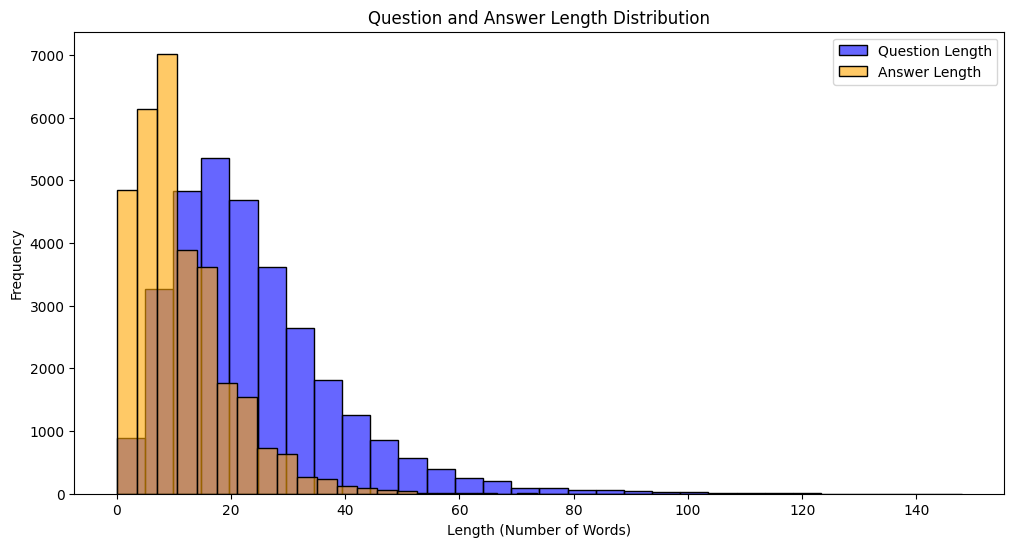

In [58]:
# 질문 및 답변 길이 계산
qna_cleaned['question_length'] = qna_cleaned['question'].apply(lambda x: len(x.split()))
qna_cleaned['answer_length'] = qna_cleaned['answer'].apply(lambda x: len(x.split()))

# 길이 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(qna_cleaned['question_length'], bins=30, color='blue', alpha=0.6, label='Question Length')
sns.histplot(qna_cleaned['answer_length'], bins=30, color='orange', alpha=0.6, label='Answer Length')
plt.title('Question and Answer Length Distribution')
plt.xlabel('Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [59]:
import pandas as pd

# a_mbti 컬럼에서 MBTI 별 데이터 개수 계산
a_mbti_counts = qna_cleaned['a_mbti'].value_counts()

# q_mbti 컬럼에서 MBTI 별 데이터 개수 계산
q_mbti_counts = qna_cleaned['q_mbti'].value_counts()

# 결과 출력
print("MBTI 별 데이터 개수:")
print( q_mbti_counts + a_mbti_counts)

MBTI 별 응답자 데이터 개수:
a_mbti
infp    4140
entp    3006
intp    2982
intj    2863
infj    2639
istp    2613
enfp    2362
isfp    2333
enfj    1547
entj    1475
isfj    1332
istj    1104
estp     782
estj     704
esfj     612
esfp     572
Name: count, dtype: int64

MBTI 별 질문 데이터 개수:
q_mbti
infp    3725
enfp    2419
entp    2218
intp    2131
infj    1909
intj    1610
istp    1352
isfp    1348
enfj    1059
entj    1057
isfj     825
istj     613
estp     551
esfp     531
esfj     504
estj     448
Name: count, dtype: int64


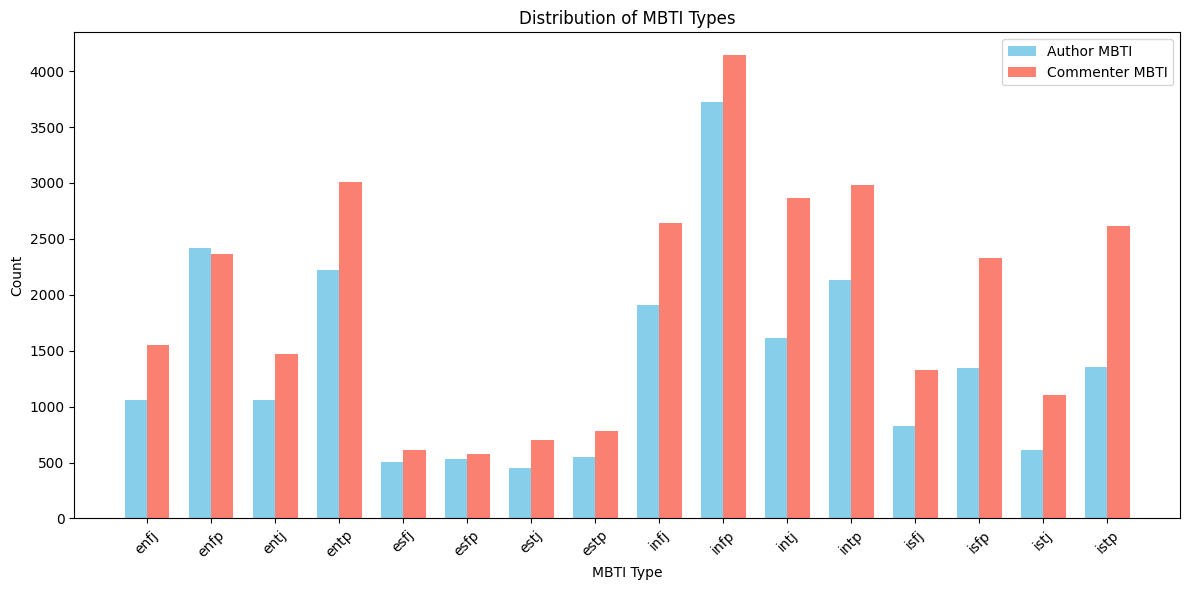

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# MBTI 값 분포 확인
mbti_counts = qna_cleaned['q_mbti'].value_counts()
mbti_counts_a = qna_cleaned['a_mbti'].value_counts()

# MBTI 타입과 카운트를 DataFrame으로 변환
mbti_df = pd.DataFrame({
    'Author MBTI': mbti_counts,
    'Commenter MBTI': mbti_counts_a
}).fillna(0)  # 결측값을 0으로 대체

# 그래프 설정
bar_width = 0.35
x = np.arange(len(mbti_df.index))  # x축 위치

plt.figure(figsize=(12, 6))

# Author MBTI 바
plt.bar(x - bar_width/2, mbti_df['Author MBTI'], width=bar_width, color='skyblue', label='Author MBTI')

# Commenter MBTI 바
plt.bar(x + bar_width/2, mbti_df['Commenter MBTI'], width=bar_width, color='salmon', label='Commenter MBTI')

# 그래프 제목 및 레이블 설정
plt.title('Distribution of MBTI Types')
plt.xlabel('MBTI Type')
plt.ylabel('Count')
plt.xticks(x, mbti_df.index, rotation=45)
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


### 모델 선정 및 평가

언어 학습 / 예측

1. **BERT** : 성능 어느정도 보장. 자원 소모 많음
2. **RoBERTa** : 1보다 향상. 소모 더 많음.
3. **DistilBERT** : 경량화. 1보다 떨어짐. 빠르고 실시간 적합.
4. **ELECTRA** : 적은 데이터에 유용. 빠름. 모델 구조 복잡함.
5. GPT-3 -> 비용 있으니까 제외

#### 사전 준비

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from transformers import BertTokenizer

# 데이터 전처리
# 결측치 제거
qna_cleaned.dropna(subset=['question', 'q_mbti', 'answer', 'a_mbti'], inplace=True)

# 텍스트 정규화 (예: 소문자 변환)
qna_cleaned['question'] = qna_cleaned['question'].str.lower()
qna_cleaned['answer'] = qna_cleaned['answer'].str.lower()

# 레이블 인코딩 (MBTI 유형을 숫자로 변환)
label_encoder_q = LabelEncoder()
label_encoder_a = LabelEncoder()
qna_cleaned['q_mbti_encoded'] = label_encoder_q.fit_transform(qna_cleaned['q_mbti'])
qna_cleaned['a_mbti_encoded'] = label_encoder_a.fit_transform(qna_cleaned['a_mbti'])

# 데이터 샘플링
sample_size = 1.0  # 사용할 샘플 비율
qna_sampled = qna_cleaned.sample(frac=sample_size, random_state=42)

# 질문과 답변을 결합하여 입력으로 사용
X = qna_sampled['question'] + " " + qna_sampled['answer']
y = qna_sampled['a_mbti_encoded']  # 답변의 MBTI를 예측

# 학습용과 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# 결과 확인
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])

학습 데이터 크기: 17840
테스트 데이터 크기: 4460


In [17]:
# 오버샘플링 및 언더샘플링
# X_train과 y_train을 데이터프레임으로 결합
train_data = pd.DataFrame({'text': X_train, 'label': y_train})

# 각 MBTI 유형별로 데이터프레임 분리
dfs = {label: train_data[train_data['label'] == label] for label in train_data['label'].unique()}

# MBTI 별 최소 샘플 수
min_count = min(train_data['label'].value_counts())

# 오버샘플링
oversampled_dfs = []
for label, data in dfs.items():
    if len(data) < min_count:
        # 부족한 만큼 복제
        oversampled_data = resample(data, replace=True, n_samples=min_count, random_state=42)
        oversampled_dfs.append(oversampled_data)
    else:
        oversampled_dfs.append(data)

# 모든 오버샘플링된 데이터프레임 결합
oversampled_train_data = pd.concat(oversampled_dfs)

# 언더샘플링
undersampled_dfs = []
for label, data in dfs.items():
    if len(data) > min_count:
        # 초과한 부분 제거
        undersampled_data = resample(data, replace=False, n_samples=min_count, random_state=42)
        undersampled_dfs.append(undersampled_data)
    else:
        undersampled_dfs.append(data)

# 모든 언더샘플링된 데이터프레임 결합
undersampled_train_data = pd.concat(undersampled_dfs)

In [18]:
# 결과 확인
print("오버샘플링된 학습 데이터 크기:", oversampled_train_data.shape[0])
print("언더샘플링된 학습 데이터 크기:", undersampled_train_data.shape[0])

오버샘플링된 학습 데이터 크기: 17840
언더샘플링된 학습 데이터 크기: 5216


In [19]:
# 결과 확인
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])

학습 데이터 크기: 17840
테스트 데이터 크기: 4460


In [20]:
# 최종 학습용 데이터와 테스트용 데이터로 분리
X_train = oversampled_train_data['text']
y_train = oversampled_train_data['label']

X_train = undersampled_train_data['text']
y_train = undersampled_train_data['label']

In [21]:
from sklearn.model_selection import KFold
# K-폴드 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### BERT


In [85]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import os

# BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [86]:
# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [87]:
# Dataset 클래스 정의
class MBTIDataset_BERT(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [99]:
# 모델 학습 및 평가 함수
def train_and_evaluate(train_idx, val_idx):
    train_texts = X_train.iloc[train_idx]
    train_labels = y_train.iloc[train_idx]
    val_texts = X_train.iloc[val_idx]
    val_labels = y_train.iloc[val_idx]

    train_dataset = MBTIDataset_BERT(train_texts, train_labels, tokenizer, MAX_LEN)
    val_dataset = MBTIDataset_BERT(val_texts, val_labels, tokenizer, MAX_LEN)

    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder_a.classes_))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,  # 에포크 수 조정 가능
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        warmup_steps=500,
        weight_decay=0.001, # 조정. 원래 0.01
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        report_to='none'  # WandB 사용 중지
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    trainer.train()

    # 모델 저장
    model.save_pretrained('./model_directory')  # 로컬에 저장
    tokenizer.save_pretrained('./model_directory')

    eval_result = trainer.evaluate()
    return eval_result

In [100]:
# 임시 테스트
MAX_LEN = 128
BATCH_SIZE = 16 # 조정

# 전체 데이터에 대해 한 번만 학습
eval_result = train_and_evaluate(range(len(X_train)), range(len(X_train)))  # 전체 인덱스 사용
results = [eval_result]  # 결과를 리스트에 추가

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.778700,2.793923
2,2.774500,2.777807
3,2.779800,2.774450
4,2.707700,2.649051
5,2.620200,2.555543
6,2.677800,2.517443
7,2.486200,2.431151
8,2.492200,2.339962
9,2.531500,2.238010
10,2.274700,2.175737


In [ ]:
"""
# K-폴드 교차 검증 수행
MAX_LEN = 128
BATCH_SIZE = 16 # 조정
results = []

for train_idx, val_idx in kf.split(X_train):
    eval_result = train_and_evaluate(train_idx, val_idx)
    results.append(eval_result)
    """

In [ ]:
# 결과 출력
for i, result in enumerate(results):
    print(f"Fold {i + 1}: {result}")

In [101]:
# 최종 테스트 데이터에 대한 평가
test_dataset = MBTIDataset_BERT(X_test, y_test, tokenizer, MAX_LEN)
model = BertForSequenceClassification.from_pretrained('./model_directory')  # 저장된 모델 로드
trainer = Trainer(model=model)

test_results_BERT = trainer.evaluate(test_dataset)
print("\n테스트 데이터에 대한 평가 결과:")
print(test_results_BERT)


테스트 데이터에 대한 평가 결과:
{'eval_loss': 2.6729347705841064, 'eval_model_preparation_time': 0.0035, 'eval_runtime': 36.9662, 'eval_samples_per_second': 120.651, 'eval_steps_per_second': 15.095}


#### DistilBERT

In [133]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from torch.cuda.amp import GradScaler, autocast

# DistilBERT 토크나이저 로드
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [134]:
# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [138]:
# Dataset 클래스 정의
class MBTIDataset_DistilBERT(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),  # Removed .to(device)
            'attention_mask': encoding['attention_mask'].flatten(),  # Removed .to(device)
            'labels': torch.tensor(label, dtype=torch.long)  # Removed .to(device)
        }

In [140]:
# 모델 학습 및 평가 함수
def train_and_evaluate(train_idx, val_idx):
    train_texts = X_train.iloc[train_idx]
    train_labels = y_train.iloc[train_idx]
    val_texts = X_train.iloc[val_idx]
    val_labels = y_train.iloc[val_idx]

    train_dataset = MBTIDataset_DistilBERT(train_texts, train_labels, tokenizer, MAX_LEN)
    val_dataset = MBTIDataset_DistilBERT(val_texts, val_labels, tokenizer, MAX_LEN)

    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder_a.classes_))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10, # EPOCH 수 조정
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        warmup_steps=500,
        weight_decay=0.001,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        report_to='none'  # WandB 사용 중지
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    trainer.train()

    # 모델 저장
    model.save_pretrained('./model_directory')  # 로컬에 저장
    tokenizer.save_pretrained('./model_directory')

    eval_result = trainer.evaluate()
    return eval_result

In [143]:
MAX_LEN = 128
BATCH_SIZE = 16
results = []

"""
for train_idx, val_idx in kf.split(X_train):# K-폴드 교차 검증 수행
    eval_result = train_and_evaluate(train_idx, val_idx)
    results.append(eval_result)"""

# 전체 데이터에 대해 한 번만 학습
eval_result = train_and_evaluate(range(len(X_train)), range(len(X_train)))  # 전체 인덱스 사용
results = [eval_result]  # 결과를 리스트에 추가

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.834500,2.780779
2,2.798000,2.775728
3,2.784500,2.774951
4,2.771800,2.774852
5,2.776500,2.772978
6,2.776200,2.773006
7,2.777200,2.772812
8,2.774200,2.772711
9,2.773600,2.772653
10,2.771900,2.772614


In [ ]:
# 결과 출력 (K-폴드 용)
for i, result in enumerate(results):
    print(f"Fold {i + 1}: {result}")

In [142]:
# 최종 테스트 데이터에 대한 평가
test_dataset = MBTIDataset_DistilBERT(X_test, y_test, tokenizer, MAX_LEN)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder_a.classes_))
trainer = Trainer(model=model)

test_results_DistilBERT = trainer.evaluate(test_dataset)
print("\n테스트 데이터에 대한 평가 결과:")
print(test_results_DistilBERT)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



테스트 데이터에 대한 평가 결과:
{'eval_loss': 2.7965891361236572, 'eval_model_preparation_time': 0.0018, 'eval_runtime': 20.5094, 'eval_samples_per_second': 217.462, 'eval_steps_per_second': 27.207}


#### 모델 평가 및 비교

In [145]:
import pandas as pd

# 각 모델의 테스트 결과
results = {
    "모델": ["BERT", "DistilBERT"],
    "eval_loss": [test_results_BERT['eval_loss'], test_results_DistilBERT['eval_loss']],
    "모델 준비 시간 (초)": [test_results_BERT['eval_model_preparation_time'], test_results_DistilBERT['eval_model_preparation_time']],
    "총 실행 시간 (초)": [test_results_BERT['eval_runtime'], test_results_DistilBERT['eval_runtime']],
    "초당 샘플 수": [test_results_BERT['eval_samples_per_second'], test_results_DistilBERT['eval_samples_per_second']],
    "초당 스텝 수": [test_results_BERT['eval_steps_per_second'], test_results_DistilBERT['eval_steps_per_second']]
}

# 데이터프레임 생성
df_results = pd.DataFrame(results)

# 결과를 더 깔끔하게 보이도록 스타일 적용
styled_df = df_results.style.set_table_attributes('style="width: 100%; border-collapse: collapse;"') \
    .set_properties(**{'border': '1px solid black', 'padding': '8px', 'text-align': 'center'}) \
    .set_caption("테스트 데이터에 대한 평가 결과") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('font-weight', 'bold')]
    }])

# 결과 출력
styled_df


,모델,eval_loss,모델 준비 시간 (초),총 실행 시간 (초),초당 샘플 수,초당 스텝 수
0,BERT,2.672935,0.003500,36.966200,120.651000,15.095000
1,DistilBERT,2.796589,0.001800,20.509400,217.462000,27.207000


In [146]:
!pip install scikit-learn

In [156]:
import torch
from transformers import BertTokenizer, DistilBertTokenizer, ElectraTokenizer
from transformers import BertForSequenceClassification, DistilBertForSequenceClassification, ElectraForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Dataset

# Dataset 클래스 정의
class MBTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 모델과 토크나이저 초기화
tokenizer_BERT = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer_DistilBERT = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model_BERT = DistilBertForSequenceClassification.from_pretrained('./model_directory')
model_DistilBERT = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder_a.classes_))

# 테스트 데이터셋 준비
test_dataset_BERT = MBTIDataset(X_test, y_test, tokenizer_BERT, MAX_LEN)
test_dataset_DistilBERT = MBTIDataset(X_test, y_test, tokenizer_DistilBERT, MAX_LEN)

# 모델을 평가하는 함수 정의
def evaluate_model(model, test_dataset):
    model.eval()
    model.to(device)
    predictions = []
    true_labels = []
    logits_list = []

    with torch.no_grad():
        for batch in DataLoader(test_dataset, batch_size=BATCH_SIZE):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
            logits_list.append(logits.cpu().numpy())

    # 로짓 리스트를 numpy 배열로 변환
    return true_labels, predictions, np.concatenate(logits_list)

# 성능 지표 계산 함수 정의
def calculate_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predictions, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predictions, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

# 각 모델 평가 및 성능 지표 계산
results = {}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [157]:
# BERT 모델 평가
true_labels_BERT, predictions_BERT, logits_BERT = evaluate_model(model_BERT, test_dataset_BERT)
results['BERT'] = calculate_metrics(true_labels_BERT, predictions_BERT)

# DistilBERT 모델 평가
true_labels_DistilBERT, predictions_DistilBERT, logits_DistilBERT = evaluate_model(model_DistilBERT, test_dataset_DistilBERT)
results['DistilBERT'] = calculate_metrics(true_labels_DistilBERT, predictions_DistilBERT)

In [158]:
# 모델 성능 평가 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# 결과에 스타일 적용
styled_results_df = results_df.style.set_table_attributes('style="width: 100%; border-collapse: collapse;"') \
    .set_properties(**{'border': '1px solid black', 'padding': '8px', 'text-align': 'center'}) \
    .set_caption("모델 성능 평가 결과") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('font-weight', 'bold')]
    }])

# 결과 출력
styled_results_df

,Accuracy,Precision,Recall,F1 Score
BERT,0.049103,0.002411,0.049103,0.004597
DistilBERT,0.093722,0.017975,0.093722,0.019841


데이터 샘플을 0.1만 사용했기 때문에 (학습 시간의 문제) 정확도가 떨어지는 것은 예상한 결과. 전반적인 지표에서 ELECTRA가 제일 좋은 결과를 냈으므로 ELECTRA를 사용하기로 함.

### 모델 최적화 및 하이퍼파라미터 조정


BERT, DistilBERT 둘 다 실행 (BERT가 더 loss 잘 나오긴 했는데)
K-Fold도 실행

#### BERT


In [28]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, f1_score
import itertools
import os

In [29]:
# BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [30]:
# Dataset 클래스 정의
class MBTIDataset_BERT(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [31]:
# 모델 학습 및 평가 함수
def train_and_evaluate(num_epochs, weight_decay, learning_rate, batch_size):
    train_dataset = MBTIDataset_BERT(X_train, y_train, tokenizer, MAX_LEN)
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder_a.classes_))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        warmup_steps=500,
        weight_decay=weight_decay,
        learning_rate=learning_rate,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        report_to='none'  # WandB 사용 중지
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset
    )

    trainer.train()

    # 모델 저장
    model.save_pretrained('./model_directory')  # 로컬에 저장
    tokenizer.save_pretrained('./model_directory')

    eval_result = trainer.evaluate()
    return eval_result

In [33]:
# MAX_LEN 정의
MAX_LEN = 128

# 그리드 서치 파라미터 설정
num_epochs_list = [3, 5, 10]
weight_decay_list = [0.001, 0.01]
learning_rate_list = [1e-5, 5e-5, 2e-5]
batch_size_list = [16]

# 결과를 저장할 리스트
results = []

# 모든 조합 생성
param_combinations = list(itertools.product(num_epochs_list, weight_decay_list, learning_rate_list, batch_size_list))

for num_epochs, weight_decay, learning_rate, batch_size in param_combinations:
    eval_result = train_and_evaluate(num_epochs, weight_decay, learning_rate, batch_size)

    # 테스트 데이터셋으로 평가 수행
    test_dataset = MBTIDataset_BERT(X_test, y_test, tokenizer, MAX_LEN)
    trainer = Trainer(model=BertForSequenceClassification.from_pretrained('./model_directory'))
    test_preds = trainer.predict(test_dataset)

    test_labels = test_preds.label_ids
    test_logits = test_preds.predictions.argmax(axis=1)

    # 정확도와 F1 스코어 계산
    acc = accuracy_score(test_labels, test_logits)
    f1 = f1_score(test_labels, test_logits, average='weighted')

    # 결과 저장
    results.append({
        'num_epochs': num_epochs,
        'weight_decay': weight_decay,
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'eval_loss': eval_result['eval_loss'],
        'accuracy': acc,
        'f1_score': f1
    })

TypeError: train_and_evaluate() missing 1 required positional argument: 'batch_size'

In [ ]:
# 결과 출력
for i, result in enumerate(results):
    print(f"Combination {i + 1}: Num Epochs = {result['num_epochs']}, Weight Decay = {result['weight_decay']}, "
          f"Learning Rate = {result['learning_rate']}, Batch Size = {result['batch_size']}, "
          f"Eval Loss = {result['eval_loss']}, Accuracy = {result['accuracy']}, F1 Score = {result['f1_score']}")

#### DistilBERT

In [22]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, f1_score
import itertools

In [23]:
# DistilBERT 토크나이저 로드
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
# Dataset 클래스 정의
class MBTIDataset_DistilBERT(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [25]:
# 모델 학습 및 평가 함수
def train_and_evaluate(train_idx, val_idx, num_epochs, weight_decay, learning_rate, batch_size):
    train_texts = X_train.iloc[train_idx]
    train_labels = y_train.iloc[train_idx]
    val_texts = X_train.iloc[val_idx]
    val_labels = y_train.iloc[val_idx]

    train_dataset = MBTIDataset_DistilBERT(train_texts, train_labels, tokenizer, MAX_LEN)
    val_dataset = MBTIDataset_DistilBERT(val_texts, val_labels, tokenizer, MAX_LEN)

    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder_a.classes_))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        warmup_steps=500,
        weight_decay=weight_decay,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        report_to='none'  # WandB 사용 중지
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    trainer.train()

    # 모델 저장
    model.save_pretrained('./model_directory')  # 로컬에 저장
    tokenizer.save_pretrained('./model_directory')

    eval_result = trainer.evaluate()
    return eval_result, model, val_dataset

In [ ]:
# 그리드 서치 파라미터 설정
num_epochs_list = [5]
weight_decay_list = [0.001, 0.01]
batch_size_list = [8, 16]

# MAX_LEN 정의
MAX_LEN = 128

# 결과를 저장할 리스트
results = []

# 모든 조합 생성
param_combinations = list(itertools.product(num_epochs_list, weight_decay_list, learning_rate_list, batch_size_list))

for num_epochs, weight_decay, learning_rate, batch_size in param_combinations:
    # 전체 데이터셋을 학습용 및 테스트용으로 분리
    train_dataset = MBTIDataset_BERT(X_train, y_train, tokenizer, MAX_LEN)
    test_dataset = MBTIDataset_BERT(X_test, y_test, tokenizer, MAX_LEN)

    # 모델 학습
    eval_result, model, _ = train_and_evaluate(range(len(X_train)), range(len(X_train)), num_epochs, weight_decay, learning_rate, batch_size)

    # Validation 데이터셋으로 예측 수행
    trainer = Trainer(model=model)
    test_preds = trainer.predict(test_dataset)
    test_labels = test_preds.label_ids
    test_logits = test_preds.predictions.argmax(axis=1)

    # 정확도와 F1 스코어 계산
    acc = accuracy_score(test_labels, test_logits)
    f1 = f1_score(test_labels, test_logits, average='weighted')

    # 결과 저장
    results.append({
        'num_epochs': num_epochs,
        'weight_decay': weight_decay,
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'eval_loss': eval_result['eval_loss'],
        'accuracy': acc,
        'f1_score': f1
    })

# 결과 출력
for i, result in enumerate(results):
    print(f"Combination {i + 1}: Num Epochs = {result['num_epochs']}, Weight Decay = {result['weight_decay']}, "
          f"Learning Rate = {result['learning_rate']}, Batch Size = {result['batch_size']}, "
          f"Eval Loss = {result['eval_loss']}, Accuracy = {result['accuracy']}, F1 Score = {result['f1_score']}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.783100,2.774975
2,2.781900,2.772996


In [ ]:
# 결과 출력
for i, result in enumerate(results):
    print(f"Combination {i + 1}: Num Epochs = {result['num_epochs']}, Weight Decay = {result['weight_decay']}, "
          f"Learning Rate = {result['learning_rate']}, Batch Size = {result['batch_size']}, "
          f"Avg Loss = {result['avg_eval_loss']}, Avg Accuracy = {result['avg_accuracy']}, Avg F1 Score = {result['avg_f1_score']}")